## About Dataset

### Context

This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1.GRE Scores ( out of 340 )

2.TOEFL Scores ( out of 120 )

3.University Rating ( out of 5 )

4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

5.Undergraduate GPA ( out of 10 )

6.Research Experience ( either 0 or 1 )

7.Chance of Admit ( ranging from 0 to 1 )

### Acknowledgements

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.

The dataset is owned by Mohan S Acharya.

### Inspiration

This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

### Questions:

In [33]:
import pandas as pd

### 1. Display Top 5 Rows of The Dataset

In [34]:
data=pd.read_csv('C:\\Users\\Hafiz Imran\\Desktop\\Projects with Matchin learning\\Admission Prediction using ML(with GUI)\\Admission_Predict.csv')

In [35]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Before proceeding with building our model, let's analyze our data. We have 6 independent variables (Serial No, GRE Score, TOEFL Score, University Rating, SOP, LOR, Research) and one dependent variable,**Chance of Admit**. Since the values in the dependent variable column are continuous.


we initially treat this problem as a regression problem. However, we will also explore treating it as a classification problem.

### 2. Check Last 5 Rows of The Dataset

In [36]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [37]:
data.shape

(400, 9)

In [38]:
print ('Number of rows',data.shape[0])
print ('Number of columns',data.shape[1])

Number of rows 400
Number of columns 9


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### 5. Check Null Values In The Dataset

In [40]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [41]:
data.describe(include="all") 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### 7. Dropping Irrelevant Features

In [42]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In our data, if we drop the first three columns ('Serial No.'), it will have no effect on the rest of our data.

In [43]:
data=data.drop('Serial No.',axis=1)

In [44]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [48]:
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']

In [49]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [53]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

### 9. Splitting The Dataset Into The Training Set And Test Set

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [58]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

### 10. Feature Scaling

In [59]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### What is Feature Scaling and Why does one need it?
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization or standardization. Feature scaling is generally performed during the data pre-processing stage, before training models using machine learning algorithms.  The goal is to transform the data so that each feature is in the same range (e.g. between -1 and 1). This ensures that no single feature dominates the others, and makes training and tuning quicker and more effective. Feature scaling can be accomplished using a variety of linear and non-linear methods, including min-max scaling, z-score standardization, clipping, winsorizing, taking logarithm of inputs before scaling, etc. Which method you choose will depend on your data and your machine learning algorithm. 

Consider a dataset with two features, age and salary. Age is usually distributed between 0 and 80 years, while salary is usually distributed between 0 and 1 million dollars. If we apply a machine learning algorithm to this dataset without feature scaling, the algorithm will give more weight to the salary feature since it has a much larger range. However, by rescaling both features to the range [-1, 1], we can give both features equal weight and improve the performance of our machine learning algorithm. 

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

### 11. Import The models

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


### 12. Model Training

In [71]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

### 13. Prediction on Test Data

In [72]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gr.predict(X_test)

### 14. Evaluating the Algorithm Classification

In [73]:
from sklearn import metrics

In [74]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [76]:
print(score1,score2,score3,score4)

0.8212082591486991 0.7597814848647668 0.8075007378856958 0.7972750309827765


In [77]:
Final_data=pd.DataFrame({'Models':['LR','SVR','RF','GR'],'R2_SCORE':[score1,score2,score3,score4]})

In [79]:
Final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.807501
3,GR,0.797275


In [80]:
import seaborn as sns

C:\Users\Hafiz Imran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

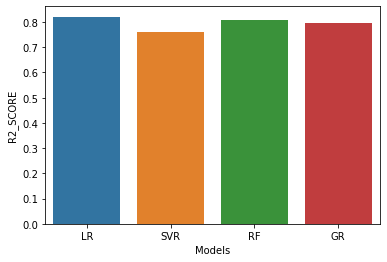

In [81]:
sns.barplot(Final_data['Models'],Final_data['R2_SCORE'])

In the bar chart, it is evident that Linear Regression has a higher value, indicating that it performs better compared to other models. Therefore, we can conclude that Linear Regression is the best model for our data.

## Classification

As we know, our dataset has a target variable with continuous values, indicating that it is a regression problem. However, for testing purposes, we will consider the problem as a classification problem. To do this, we need to convert the values of our target variable into categorical values: 0 and 1. We will set a threshold value of 0.8, meaning that if the value of our target variable is greater than 0.8, it will be assigned as 1; otherwise, it will be assigned as 0.

In [83]:
import numpy as np

In [84]:
y_train=[1 if value>0.8 else 0 for value in y_train]
y_test=[1 if value>0.8 else 0 for value in y_test]

y_train=np.array(y_train)
y_test=np.array(y_test)

In [85]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### 15. Import The models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics  import accuracy_score

### 16. Model Training & Evaluation

In [96]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print(accuracy_score(y_test,y_pred1))


0.925


In [97]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.925


In [100]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print(accuracy_score(y_test,y_pred3))

0.8875


In [102]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))


0.925


In [103]:
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)
y_pred5=gr.predict(X_test)
print(accuracy_score(y_test,y_pred5))

0.975


In [104]:
Final_data=pd.DataFrame({'Models':['LR','SVM','KNN','RF','GB'],'ACC_SCORE':[accuracy_score(y_test,y_pred1),
                                                                          accuracy_score(y_test,y_pred2),
                                                                          accuracy_score(y_test,y_pred3),
                                                                          accuracy_score(y_test,y_pred4),
                                                                          accuracy_score(y_test,y_pred5)]})

In [105]:
Final_data

,Models,ACC_SCORE
0,LR,0.9250
1,SVM,0.9250
2,KNN,0.8875
3,RF,0.9250
4,GB,0.9750


In [106]:
import seaborn as sns

C:\Users\Hafiz Imran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC_SCORE'>

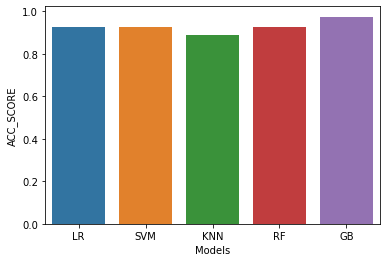

In [107]:
sns.barplot(Final_data['Models'],Final_data['ACC_SCORE'])

### 17. Save The Model

In this step, we will save our best model for production. Previously, we used the train-test split method to evaluate the model. However, for production purposes, we need to train our model on the entire dataset to obtain better results.

In [109]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [113]:
X=data.drop("Chance of Admit ",axis=1)
y=data['Chance of Admit ']

In [114]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

Now, we will convert the **y** values into categorical values, specifically 0 and 1.

In [115]:
y=[1 if value>0.8 else 0 for value in y]

In [118]:
y=np.array(y)

In [119]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

Now, we will apply feature scaling to our independent variables.

In [122]:
X=sc.fit_transform(X)

In [123]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [124]:
gr=GradientBoostingClassifier()
gr.fit(X,y)

GradientBoostingClassifier()

In [125]:
import joblib

In [126]:
joblib.dump(gr,'Graduate_Admission_Predict_Model')

['Graduate_Admission_Predict_Model']

In [127]:
model=joblib.load('Graduate_Admission_Predict_Model')

#### Test the Model 

In [128]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [131]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

C:\Users\Hafiz Imran\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

##### As the result is 1, it indicates that the student has a higher chance of admission.

### 18.GUI

In [2]:
from tkinter import *
import joblib

In [3]:
def show_entry_fields():
    p1=int(R1.get())
    p2=int(R2.get())
    p3=int(R3.get())
    p4=float(R4.get())
    p5=float(R5.get())
    p6=float(R6.get())
    p7=int(R7.get())
   

               
    model=joblib.load("Graduate_Admission_Predict_Model")
    result=model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7]]))
    if result==0:
        Label(master,text="Student has a Less chance of admission:").grid(row=15,column=1)
    else:
        Label(master,text="Student has a higher chance of admission:").grid(row=15,column=1)
        

master= Tk ()
master.config(bg="white")
master.title("Graduate_Admission_Predict_Model")
master.geometry("450x400")

label=Label(master,text="Graduate_Admission_Predict_Model",bg="black",fg="white",font=('arial', 12, 'bold')).grid(row=0,columnspan=2)

label=Label(master,text="Enter GRE Score:",font=('arial', 10, 'bold')).grid(row=1)
label=Label(master,text="Enter TOEFL Score: ",font=('arial', 10, 'bold')).grid(row=2)
label=Label(master,text="Enter University Rating:",font=('arial', 10, 'bold')).grid(row=3)
label=Label(master,text="Enter SOP:",font=('arial', 10, 'bold')).grid(row=4)
label=Label(master,text="Enter LOR: ",font=('arial', 10, 'bold')).grid(row=5)
label=Label(master,text="Enter CGPA: ",font=('arial', 10, 'bold')).grid(row=6)
label=Label(master,text="Enter Research: ",font=('arial', 10, 'bold')).grid(row=7)


R1=Entry(master)
R2=Entry(master)
R3=Entry(master)
R4=Entry(master)
R5=Entry(master)
R6=Entry(master)
R7=Entry(master)



R1.grid(row=1,column=1)
R2.grid(row=2,column=1)
R3.grid(row=3,column=1)
R4.grid(row=4,column=1)
R5.grid(row=5,column=1)
R6.grid(row=6,column=1)
R7.grid(row=7,column=1)




Button(master,text="Predict",font=('arial', 10, 'bold'),command=show_entry_fields).grid()




mainloop()